# Hälsostudie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

## Del 1 - Läs in fil + hälsokontroll

- Skriver ut de fem första raderna för att få en överblick av datan
- Skriver ut info för att se vilka datatyper samt om vi har några NaN-värden vi behöver hantera, vilket vi inte har i detta fall
- Skriver ut describe för att få en snabb överblick av medel, std, max och min.
- Avslutar med att se om det finns några dubbletter vi behöver hantera, vilket vi inte har i detta fall

In [3]:
data = pd.read_csv('data/health_study_dataset.csv')

display(data.head())
display(data.info())
display(data.describe())
print(data.duplicated().any())

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


None

,id,age,height,weight,systolic_bp,cholesterol,disease
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,49.426250,171.849250,73.413000,149.178625,4.929150,0.058750
std,231.0844,14.501118,9.804259,13.685059,12.793360,0.848413,0.235303
min,1.0000,18.000000,144.400000,33.700000,106.800000,2.500000,0.000000
25%,200.7500,39.000000,164.775000,64.800000,140.900000,4.327500,0.000000
50%,400.5000,50.000000,171.350000,73.200000,149.400000,4.970000,0.000000
75%,600.2500,59.000000,178.925000,82.600000,157.600000,5.482500,0.000000
max,800.0000,90.000000,200.400000,114.400000,185.900000,7.880000,1.000000


False


## Del 2 - Beskrivande analys
- Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.
- Skapa minst 3 olika grafer 

In [4]:
selected_columns = ['age', 'weight', 'height', 'systolic_bp', 'cholesterol']
summary = data[selected_columns].agg(['mean', 'median', 'min', 'max']).round(2)
display(summary)

,age,weight,height,systolic_bp,cholesterol
mean,49.43,73.41,171.85,149.18,4.93
median,50.00,73.20,171.35,149.40,4.97
min,18.00,33.70,144.40,106.80,2.50
max,90.00,114.40,200.40,185.90,7.88


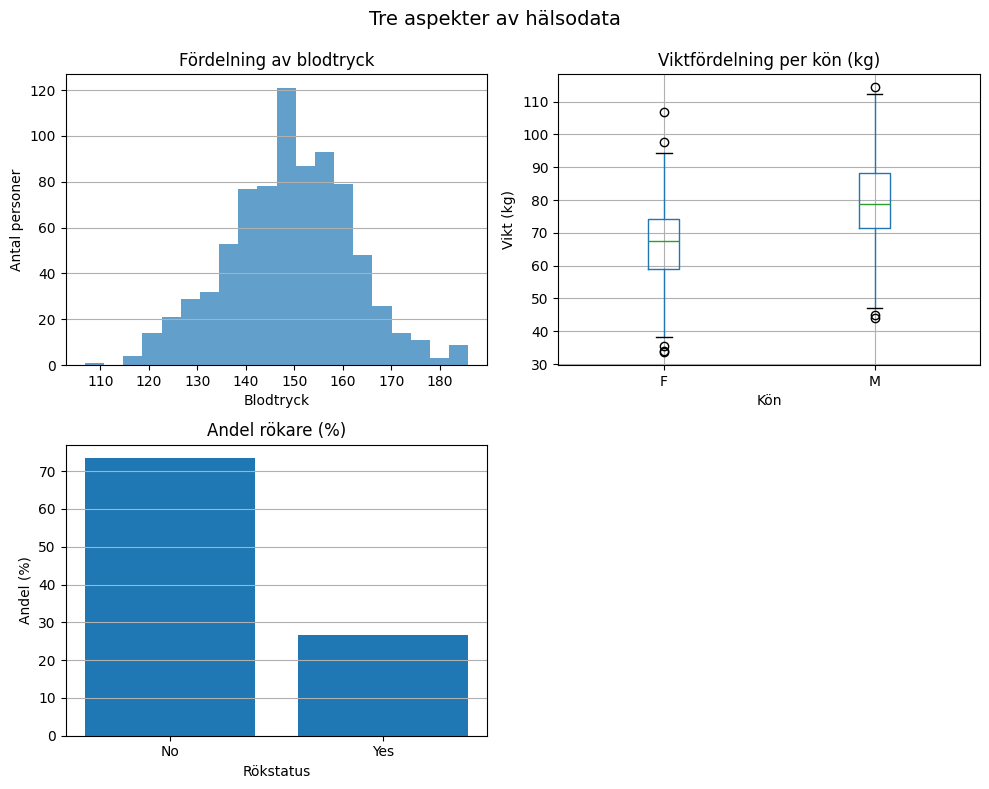

In [5]:
# Skapar en samlad figur med tre grafer som visualiserar olika aspekter av hälsodatat
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].hist(data['systolic_bp'], bins=20, alpha=0.7)
axes[0,0].set_title('Fördelning av blodtryck')
axes[0,0].set_xlabel('Blodtryck')
axes[0,0].set_ylabel('Antal personer')
axes[0,0].grid(True, axis='y')

data.boxplot(column='weight', by='sex', ax=axes[0,1])
axes[0,1].set_title('Viktfördelning per kön (kg)')
axes[0,1].set_xlabel('Kön')
axes[0,1].set_ylabel('Vikt (kg)')
axes[0,1].grid(True)

count_smoker = data['smoker'].value_counts(normalize=True) * 100
axes[1,0].bar(count_smoker.index, count_smoker.values)
axes[1,0].set_title('Andel rökare (%)')
axes[1,0].set_xlabel('Rökstatus')
axes[1,0].set_ylabel('Andel (%)')
axes[1,0].grid(True, axis='y')

axes[1,1].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Tre aspekter av hälsodata', fontsize=14)
plt.show()

## Del 3 - Simulering kopplad till caset

1. Jag börjar med att ta ut antal och andel sjuka/friska från mitt urval

2. Sen skapar jag en slumpmässig simuering med 1 000 peresoner där jag använder andelen friska/sjuka från mitt dataset och tar ut samma info.

3. För att kunna jämföra och få en tydlig överblick skapar jag en DataFrame. Siffrorna blir snarlika då jag satt andel som parameter i min simulering. Det som skiljer är 200 personer i antal och lite i andel från simulering till simulering.

In [6]:
# Tar ut data från mitt urval
num_sick = data['disease'].sum()                    
num_healthy =(data['disease'] == 0).sum()           
share_sick = data['disease'].mean()      # Då totalsumman av 'disease' blir samma som antalet sjuka kan vi ta medelvärdet av hela kolumnen           
share_healthy = 1 - share_sick  

# Skapar simulering och tar ut samma info
n = 1000
sim_disease = np.random.choice([0, 1], size= n, p=[share_healthy, share_sick])

num_sick_sim = sim_disease.sum()
num_healthy_sim = (sim_disease == 0).sum()
share_sick_sim = sim_disease.mean()
share_healthy_sim = 1 - share_sick_sim

# Skapar en DataFrame för att kunna jämföra och presentera resultatet
results = pd.DataFrame({
    'Kategori': ['Sjuka', 'Friska'],
    'Antal (data)': [num_sick, num_healthy],
    'Antal (sim)': [num_sick_sim, num_healthy_sim],
    'Andel (data, %)': [round(share_sick * 100, 2), round(share_healthy * 100, 2)],
    'Andel (sim, %)': [round(share_sick_sim * 100, 2), round(share_healthy_sim * 100, 2)]
})

results

,Kategori,Antal (data),Antal (sim),"Andel (data, %)","Andel (sim, %)"
0,Sjuka,47,56,5.88,5.6
1,Friska,753,944,94.12,94.4


## Del 4 - Konfidensintervall

1. Jag börjar med att ta ut data samt nyckelvärden.

2. Räknar sedan ut konfidensintervall med "Normal approximation" samt "Bootstrap"

3. Slutligen jämför jag de båda metoderna

In [7]:
# Skapar en arry med alla blodtrycksvärden
systolic_bp = np.array(data['systolic_bp'] ) 

# Tar ut nyckelvärden
n = len(systolic_bp)
mean = np.mean(systolic_bp)
std = np.std(systolic_bp, ddof=1)

print(f'Antal: {n}\nMedelvärde: {mean:.2f}\nStandardavvikelse: {std:.2f}')

Antal: 800
Medelvärde: 149.18
Standardavvikelse: 12.79


### Normal approximation (del 4a)
1. Börjar med att räkna ut standardfel med hjälp av variablerna jag skapat ovan

2. Då urvalet är stort 800 st använder jag z-värde 1.96 istället för t-värde

3. Räknar ut konfidensintervallets lägsta och högsta värden

In [8]:
se = std/np.sqrt(n)
z = 1.96        
lower = mean - z * se
upper = mean + z * se

print(f'95 % konfidensintervall: ({lower:.2f} - {upper:.2f})')

95 % konfidensintervall: (148.29 - 150.07)


### Bootstrap (del 4b)
1. Börjar med att välja antal resamplingar

2. Tar sedan ut 5 000 nya medelvärden och sparar i mean_boot. Iställer för att göra en for-loop så skpar jag en 2D-array där jag räknar ut medelvärdet för varje rad.

3. Sätter mina percentiler till 2.5 och 97.5 för att få 95 % konfidensintervall

In [9]:
B = 5_000
mean_boot = np.random.choice(systolic_bp, (B, n), replace=True).mean(axis=1)
lower_boot = np.percentile(mean_boot, 2.5)
upper_boot = np.percentile(mean_boot, 97.5)

print(f'95 % konfidensintervall (bootstrap): ({lower_boot:.2f} - {upper_boot:.2f})')

95 % konfidensintervall (bootstrap): (148.34 - 150.08)


### Jämförelse - Normal approximation vs Bootstrap (del 4c)

Då vi har ett stort urval och blodtryckesvärdena är ralativt normalfördelade ger båda metoderna snarlika konfidensintervall.

Medelvärdet från urvalet (149.18) ligger inom intervallen, vilket tyder på att skattningen är stabil och att båda metoderna fungerar väl för detta urval.


In [10]:
konf_result = pd.DataFrame({
    'Kategori': ['Normal approximation', 'Bootstrap'],
    'Lägsta värde': [lower, lower_boot],
    'Högsta värde': [upper, upper_boot],
    'Observerat medlevärde': [mean, mean],
    
})

display(round(konf_result, 2))

,Kategori,Lägsta värde,Högsta värde,Observerat medlevärde
0,Normal approximation,148.29,150.07,149.18
1,Bootstrap,148.34,150.08,149.18


## Del 5 - Hypotesprövning

1. Börjar med att skapa två variebler. En med blodtrycket för alla rökare och en med blodtrycket för alla icke-rökare.
2. Skriver ut medelvärdet från båda grupperna. Vid en snabb jämförelse ser det ut som rökare har högre blodtryck än icke-rökare. (ca 149.52 vs 149.05) 
3. Skapar två olika diagram för att visuelt analysera datan ytterligare.
    - Histogrammet visar att båda grupperna följer en ganksa jämn normalfördelning av blodtrycken. Det är däremot många fler i gruppen icke-rökare än rökare.
    - Boxplot visar att vi har några extremvärden, speciellt ett i gruppen "rökare" som skulle kunna dra ner snittet något. Men då vi inte fått några tydliga principer hur extremvärden ska hanteras får dessa vara kvar.

4. För att se om obesrvationen om skillnaden i medelvärdet är tillräcklig stark eller om det endast var slump går jag vidare med hypotetsprövningen (T-test och bootstrap)
- Nollhypotes: Det finns ingen skillnad mellan blodtrycken för rökare och icke-rökare
- Alternativhypotes: Rökare har högre blodtryck än icke-rökare (ensidigt t-test)

In [11]:
# Delar upp blodtrycken, rökare och icke-rökare
smokers = data[data["smoker"] == "Yes"]["systolic_bp"].values
non_smokers = data[data["smoker"] == "No"]["systolic_bp"].values

# Skriver ut medelvärde från båda grupper
print("Medel blodtryck (rökare):", smokers.mean())
print("Medel blodtryck (icke-rökare):", non_smokers.mean())

Medel blodtryck (rökare): 149.524882629108
Medel blodtryck (icke-rökare): 149.05298126064736


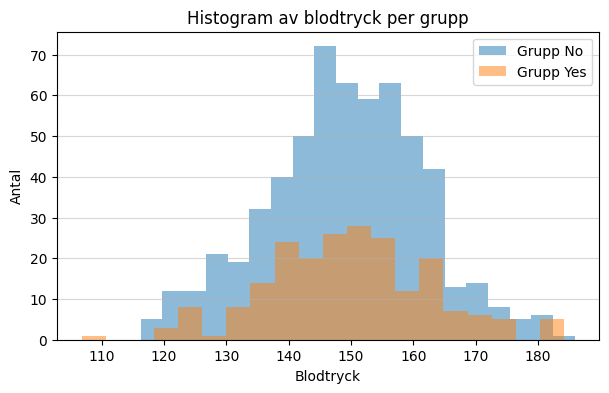

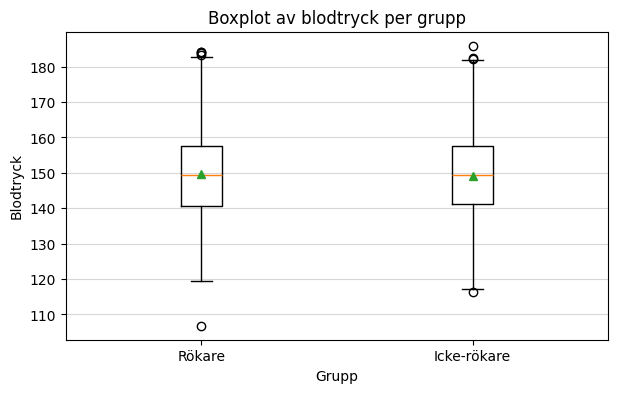

In [12]:
# Skapar två diagram för att visualisera datan
fig, ax = plt.subplots(figsize=(7,4))
for g, subset in data.groupby('smoker'):
    ax.hist(subset['systolic_bp'], bins=20, label=f'Grupp {g}', alpha=0.5)
ax.set_title('Histogram av blodtryck per grupp')
ax.set_xlabel('Blodtryck')
ax.set_ylabel('Antal')
ax.grid(True, axis='y', alpha=0.5)
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(7,4))
ax.boxplot([data.loc[data['smoker'] == 'Yes', 'systolic_bp'], data.loc[data['smoker'] == 'No', 'systolic_bp']], tick_labels=['Rökare', 'Icke-rökare'], showmeans=True)
ax.set_title('Boxplot av blodtryck per grupp')
ax.set_xlabel('Grupp')
ax.set_ylabel('Blodtryck')
ax.grid(True, axis='y', alpha=0.5)
plt.show()

### T-test (del 5a)
1. Skapar först ett welch t-test. (Antar inte lika varians)

2. Räknar sedan ut ensidigt t-test då vi i beskrivningen fått en given hypotes att testa. (”Rökare har högre medel-blodtryck än icke-rökare.”) 

3. Döper sedan om för att ha ett tydligt namn (när jag sedan tar ut ytterligare ett p-värde från bootstrap)

In [13]:
# Tvåsidigt welch t-test. 
t_stat, p_val_two_sided = stats.ttest_ind(smokers, non_smokers, equal_var=False)

# Reäknar ut ensidigt t-test 
if smokers.mean() > non_smokers.mean():
    p_val_one_sided = p_val_two_sided / 2
else:
    p_val_one_sided = 1 - (p_val_two_sided / 2)

p_value_t = p_val_one_sided


### Bootstrap (del 5b)
1. Tar ut den observerade skillnaden i medlevärde

2. Lägger ihop alla blodtryck från båda grupperna då jag utgår från Nollhypotesen (ingen skillnad)

3. Skapar en ny variabel 'boot_diffs' där jag genom en loop slumpar fram 10 000 nya grupper av rökare och icke-sökare och tar skillnaden mellan medelväre och lägger in i variabeln.


In [14]:
# Observerad skillnad
obs_diff = smokers.mean() - non_smokers.mean()

# Kombinera alla blodtryck
all_bp = np.concatenate([smokers, non_smokers])

# Bootstrap-loop
n_boot = 10_000
boot_diffs = []

for i in range(n_boot):
    np.random.shuffle(all_bp) 
    new_smokers = all_bp[:len(smokers)]
    new_nonsmokers = all_bp[len(smokers):]
    boot_diffs.append(new_smokers.mean() - new_nonsmokers.mean())

boot_diffs = np.array(boot_diffs)

p_value_boot = np.mean(boot_diffs >= obs_diff)


In [19]:
alpha = 0.05
p_value_t
p_value_boot

print('P-värde t-test (ensidigt):', p_value_t)

if p_value_t < alpha:
    print('Nollhypotesen ör ej trolig, rökare har tydligt högre blodtryck än icke-rökare \n')
else:
    print('Nollhypotesen är trolig, ingen tydlig skillnad i blodtrycksvärde mellan rökare och icke-rökare \n')

print('P-värde bootstrap:', p_value_boot)

if p_value_boot < alpha:
    print('Nollhypotesen ör ej trolig, rökare har tydligt högre blodtryck än icke-rökare')
else:
    print('Nollhypotesen är trolig, ingen tydlig skillnad i blodtrycksvärde mellan rökare och icke-rökare')

P-värde t-test (ensidigt): 0.3263669371699499
Nollhypotesen är trolig, ingen tydlig skillnad i blodtrycksvärde mellan rökare och icke-rökare 

P-värde bootstrap: 0.3288
Nollhypotesen är trolig, ingen tydlig skillnad i blodtrycksvärde mellan rökare och icke-rökare


### Analys av p-värde (del 5c)

Både t-test och bootstrap ger p-värden över 0.05, vilket betyder att skillnaden i medelblodtryck mellan rökare och icke-rökare inte är statistiskt signifikant.

Även om rökare i genomsnitt har något högre blodtryck, är skillnaden så liten att den med stor sannolikhet kan bero på slumpen.
Vi kan därför inte förkasta nollhypotesen – det finns alltså inget tydligt stöd för att rökare faktiskt har högre blodtryck än icke-rökare i vårt urval.

Nedan skapar jag en graf med 95% konfidensintervall för att tydligt visualisera skillnaden i medelvärde jag fått fram via bootstraptestet. Här kan man se att både vår obesrerade skillnad samt noll-värdet ligger inom konfidenintervallet.

In [16]:
lower_ci = np.percentile(boot_diffs, 2.5)
upper_ci = np.percentile(boot_diffs, 97.5)

print(f"95% konfidensintervall för skillnaden: [{lower_ci:.2f}, {upper_ci:.2f}]")
print(f"Observerad skillnad: {obs_diff:.2f}")

95% konfidensintervall för skillnaden: [-2.01, 2.05]
Observerad skillnad: 0.47


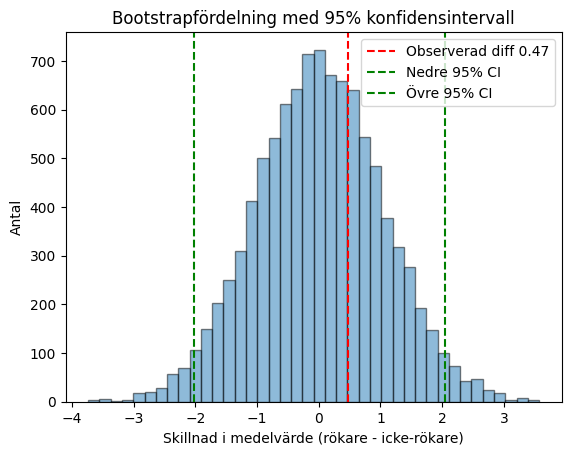

In [17]:
plt.hist(boot_diffs, bins=40, alpha=0.5, edgecolor='black')
plt.axvline(obs_diff, color='red', linestyle='--', label=f'Observerad diff {round(obs_diff, 2)}')
plt.axvline(lower_ci, color='green', linestyle='--', label='Nedre 95% CI')
plt.axvline(upper_ci, color='green', linestyle='--', label='Övre 95% CI')

plt.title('Bootstrapfördelning med 95% konfidensintervall')
plt.xlabel('Skillnad i medelvärde (rökare - icke-rökare)')
plt.ylabel('Antal')
plt.legend()
plt.show()

## Poweranalys - Del 6
1. Jag börjar med att ta ut diverse data, observerad skillnad i medelvärde, standardavikelse samt antal för de båda grupperna

2. Sen simulerar jag 10 000 nya set med hjälp av datan jag nyss tagit ut.

3. För varje uppsättning gör jag ett t-test och ser om p-värdet < alpha.

4. Min counter räknar antal p-värden < alpha. Delar dessa med antal simuleringar för att se hur stor andel som hamnat där = power

5. Avslutar med en analys av min power

In [21]:
# Observerad skillnad i medelvärde
mean_diff = smokers.mean() - non_smokers.mean()

# Standardavvikelser och antal i grupperna
std_smokers = smokers.std(ddof=1)
std_non = non_smokers.std(ddof=1)
n_smokers = len(smokers)
n_non = len(non_smokers)

# Simulering av 10 000 nya dataset
n_sim = 10_000
counter = 0

for _ in range(n_sim):
    sim_smokers = np.random.normal(loc=non_smokers.mean() + mean_diff, scale=std_smokers, size=n_smokers)
    sim_non = np.random.normal(loc=non_smokers.mean(), scale=std_non, size=n_non)
    
    t_stat, p_val_two_sided = stats.ttest_ind(sim_smokers, sim_non, equal_var=False)
    p_val_one_sided = p_val_two_sided / 2
    if p_val_one_sided < alpha:
        counter += 1

# Uppskattad power
power = counter / n_sim
print(f"Uppskattad power: {power:.2f}")

Uppskattad power: 0.13


### Analys av power (del 6a)

Resultatet blev power ≈ 0.13, vilket innebär att vårt test endast har 13 % chans att upptäcka skillnaden i blodtryck mellan rökare och icke-rökare. 

Detta är mycket lågt, vilket tyder på att vi har för få observationer eller att skillnaden är för liten för att testet ska kunna påvisa den på ett tillförlitligt sätt. Då vårt urval är relativt stort (800 personer) lutar det mer år det senare alternativet, att den sanna skillnaden i blodtryck mellan rökare och icke-rökare är liten i förhållande till variationen i datan